# conceptos aprendidos
- El descenso del gradiente es una técnica de optimización, matemáticamente se quiere buscar los puntos críticos o máximos y mínimos de una función no convexa.
- usaremos el decenso del gradiente para optimizar una funcion (escogida arbitratraimente), practicamente encontraremos el punto mas bajo de la funcion, en ML queremos que nuestra prediccion tenga muy poco error, por lo cual queremos optimizar nuestra fucnion de coste.
- entenderemos como partiendo de un punto aleatorio en el grafico de una funcion, iremos decendiendo decendiendo (optimizando ) iterativamente, por medio de calcular la pendiente = gradiente (suma de derivadas parciales)  hasta llegar a un punto minimo
- entenderemos que es el hiperparametro lr
# funciones nuevas
- aprenderemos a crear un funcion lambda npara definir y manipular nuestra funcion  
func = lambda th: np.sin((1/2 * th[0] ** 2) - (1/4 * th[1] ** 2) + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1]) 
- aprenderemos a plotear en 3d desde vista aerea: 
X_ = valores de x (100), Y_ valores de y(100), z_ = matriz (100,100), que funcionara como una imagen donde cada indice indica la posicion de cada pixel, y valor dentro del indice sera = el valor del pixel (z)
plt.contourf(_x, _y, _z, resolucion =100)   
plt.colorbar()  

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


# gradient decent 
El descenso del gradiente es una técnica de optimización, matemáticamente se quiere 
buscar los puntos críticos o máximos y mínimos de una función no convexa.   
lo que quueremos hacer es optimizar una funcion asi que primero que nada definimos la funcion que queremos optimizar. ten en cuenta que la funcion tiene que ser derivable.   
1. definimos la funcion en python   
### la funcion a optimizar 

Podemos optimizar cualquier funcion mientras sea derivable. en este caso optimizaremos una funcion cualquiera de wikipedia.
la funcion sera:
$ F(x,y)= sin(((1/2)*x^2)-(1/4)*y^2+3)(cos(2x+1-e^y))$ 

In [ ]:

""" 
creamos una funcion anonima que nos ayudara a trabajar mas coomdamente al 
momento de introducir el valor de las variables a la funcion. esto se define 
con lambda. 
al definir la funcion anonima x = th[0], y = th[1] 
"""
func = lambda th: np.sin((1/2 * th[0] ** 2) - (1/4 * th[1] ** 2) + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1]) 
# ahora podemos pasar valores de x, y facilmente a la funcion 
func([5, 3])




-0.5956138973318122

# creamos la grafica de la funcion 
para esto evaluamos la funcion en un conjunto de valores diferentes de x, y. 
## plotear la superficie area de una funcion 
Utilizaremos plt.plotcontour para imprimir una grafica del un conjunto de cordenadas, la funcion de plotear recibira 3 conjuntos de datos:
  1. vector (lista) valores de x
  2. vector de valores de y 
  3. matriz con cordenadas de x, y con valores con valores de z

Primero crearemos los vectores y la matriz, para esto crearemos 100 valores de x, y desde -2 a 2.  

Despues crearemos la matriz de Z, para esto evaluaremos los vectores antes creados en la fucnion func. 






## otra forma de ver la derivada, metodo de minimas diferencias 
una derivada es un pequeño incremento osea cuanto vria el output de la funcion, en funcion de un pequeño incremento en el imput. con el cual se puede calcualar un ratio de la diferencia entre la f(x) + (un pequeño incremento)- f(x) y asi podemos saber cual es la diferencia de la salida respecto a un pequeño variante en el imput. 
para calcular la derivada entre dos puntos distantes se calcula por la siguiente funcion.    

$m = (y2-y1)/(x2-x1)$   

sustituimos valores de la fucnion y tenemos     

$ m = (f(x+h) -f(x))/ x + h - x $   

busca la ecuacion para calcular la tangente entre 2 puntos con distancia que tiende a 0 y vas a encontrar la definicion de la derivada con la siguiente funcion, nosotros en lugar de definirla con un limite el parametro h que es la distancia entre 1 punto y otro lo definiremos como un numero muy pequeño que tienda a 0.   

 $ m = (f(x+h) -f(x))/ h $  
  
si aun no entiendes ve el video de "que es la derivada " de matefacil  


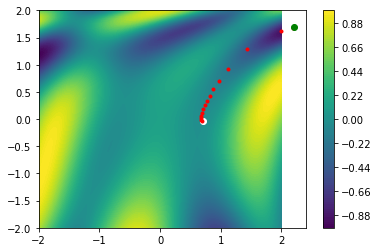

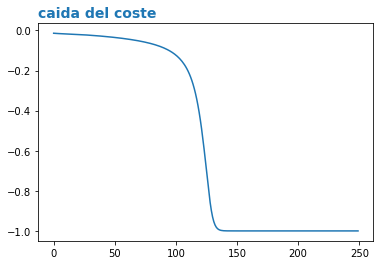

In [ ]:
# crearemos vectores x,y en el rango (-2, 2) con 100 valores usando numpy 
res = 100

_x = np.linspace(-2, 2, res)
_y = np.linspace(-2, 2, res)

# crearemos una matriz con ceros con el tamaño de 100x100
_z = np.zeros((res, res))

# rellenaremos la matriz _z con valores que evaluaremos en la funcion 
# enumerate sirve para regresar el inidice y el valor de lista 
for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy, ix] = func([x, y])

# en vez de contour usaremos contourf para que la grafica sea solida
# aumentamos la resolucion introduciendo el parametro 100

plt.contourf(_x, _y, _z, 100)
plt.colorbar()


"""
creamos un punto aletorio entre -2, 2 para iniciar la optimizacion
la funcion np.random.rand  Create an array of the given shape en un rango de [0, 1)
creamos una funcion para pasar del rango (0,1) > (-2, 2)
la funcion seria f(x) = x4 - 2
"""
theta = np.random.rand(2)
theta = theta * 4 - 2


"""" 
calculamos las derivadas parciales para el eje de x, y por medio dle metodo de minimas diferencias

"""
# definimos hiperparametros 
lr = 0.05 # learning rate
h = 0.001 # indica la cantidad de vairacion de x,y en la derivada 
epoch = 250
# caluclamos la variable para cada valor de theta usando la definicion de la derivada 

# debido a que vamos a modificar el valor de theta creamos una copia
_t = np.copy(theta)
# definimos la varable que contendra el vector gradiente  
grad = np.zeros(2)

cost = np.zeros(epoch)

# imprimimos el inicio 
plt.plot(theta[0], theta[1], 'o', c = 'white')

# creamos un bucle para que el gradiente se le sume al valor de theta
# calculamos la pendiente cuando (x,y) tienen el valor de theta
for _ in range(epoch):
  _t = np.copy(theta)

  for ti, t in enumerate(theta):
    _t[ti] = _t[ti] + h
    deri = (func(_t) - func(theta)) / h
    
    # la derivada es un numero que indica la pendiente de ti
    # el bucle calculara primero la derivada de t[0] == x y despues hara lo mimsmo con y 
    # el valor de la derivada de x y la de y formara un vector de 2d que sera el gradiente 
    grad[ti] = deri
  theta = theta - lr * grad
  # creamos un vector para plotear el grado de avance de nuestra funcion de coste
  cost[_] = func(theta)

  # creamos una condicion para que cada vez que el residuo sea = 0 se imprima un punto 
  # es lo mismo que decir imprime cada 10 repeticiones del bucle
  if _ % 10 == 0:
    # imprimimos los puntos de  el avance 
    plt.plot(theta[0], theta[1], '.', c = 'red')
    # creamos un vector para plotear el grado de avance de nuestra funcion de coste
    cost[_] = func(theta)


plt.plot(theta[0], theta[1], 'o', c = 'green')

# agregamos otra grafica a los resultados (self practice)
# sacado de aqui https://aprendeconalf.es/docencia/python/manual/matplotlib/
fig, ax = plt.subplots()
ax.plot(cost)
ax.set_title('caida del coste', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

plt.show()

In [ ]:
np.random.rand()

0.816450643608209

 # conclucion 
el ajuste de hiperparametros es algo importante ya que mediante estos podemos optimizar el funcionanmiento de nuestro modelo, y por lo tanto encontrar la solucion o punto minimo de la funcion mas rapido, el hiperparametro aqui es "lr y h" aunque tambien las epocas ayudan a que el tiempo de ejecucion sea mas rapido 

# mas notas de la primera vez que lo hice 

# El entorno para trabajar 
ahora vamos a graficar nuestra funcion en 3D ya que las variables x e y generan un plano y el resultado de la funcion genera la altura. 
## como generar un conjunto de datos que nos permita visualizar una funcion
esto lo logramos con la funcion <b> np.linspace(limite inferior, limite superior, cantidad de dato) </b> esto genera un vector 

## vamos a hacer una representacion grafica de vista de pajaro 


para realizarlo usamos la graficacion <b> plt.contour(_x, _y, _z, "numero de anillas=resolucion")  </b>, la version solida de esta fucnion es <b> plt.contourf(_x, _y, _z, "numero de anillas=resolucion")  </b> la cual necesita de valores de entradaun vector de valores para X, un vector de valores para Y y una matriz de valores Z = f(X, Y) con la forma de la multiplicacion de los vectores X y Y 
1. Para esto vamos a generar un vector con una secuencia de valores de x e y
2. para cada una de las convinvcione de esos valores la vamos a evaluar con nuestra funcion y asi generamos la matriz _z
    
    2.1 para esto creamos una variable con una matriz de 100x100 vacia con la funcion <b>np.zero(dimencion, dimencion) </b>
    
    2.2 necesitamos introducir cada uno de los resultados de la evaluacion de cada valor de _x y_y en su respectivo indice de la matriz _z 
    2.2.1 para esto generamos un vector con los indices de cada vector de secuencias, para esto ocupamos la funcion <b>enumerate </b> que se junta con la funcion <b>for </b> la cual devuelve en cada iteracion del bucle, el indice del valor extraido del vector, y tambien devuelve el valor de la secuencia del vector.
    3. eso lo representaremos en una grafica

Para que la visualizacion mejore podemos añadir un colorbar  <b> plt.colorbar()  </b> que nos indique una leyenda

## Generar un vector aleatorio en nuestra grafica 
para esto utilizamos la funcion <b> np.random.rand(numero de valroes aleatorios D0, ""D1,...)  </b> lo que que nos dara un array de numeros aleatorios enun rango de 0 a 1.

# la optimizacion 
la realizaremos con las derivadas parciales con la cual se calculara la derivada parcial en un punto pra saber su pendiente. por lo cual debemos calcular la derivada para cada parametro de nuestro vector de parametros (osea cada dimencion ).
## otra forma de ver la derivada 
una derivada es un pequeño incremento osea cuanto vria el output de la funcion, en funcion de un pequeño incremento en el imput. con el cual se puede calcualar un ratio de la diferencia entre la f(x) + (un pequeño incremento)- f(x) y asi podemos saber cual es la diferencia de la salida respecto a un pequeño variante en el imput 
### la funcion np.copy
esta nos sirve para crear una copia de una variable y de esta forma nos permite mantener los valores de la variable copia mientras modificamos la variable copiada.

### metodo de diferencias minimas 
es un metodo que sirve para calcular una aproximacion de la derivada parcial. 
consiste en calcular pequeñas diferencias entre los parametros de entrada de la fucnion y esto nos proporcionara la derivad de nuestra funcion 
normalmente lo que utilizariamos es cualquier libreria que ofrezca calculo numerico de autodifenciacion, como Numpy o scypy. que ofrecen modulos de autodiferenciacion con lo cual se ocupa eso para deerivar cualquier funcion proporcionada. 

## generando las derivadas
definimos la varaible donde se guardara la derivada que solo sera la diferecia, y este es un  ratio y al final tenemos la derivada parcial del primer vector, la pendiente de movernos  en el eje de _T[0] en la siguiente iteracion se evaluara la derivada parcial de _T[1]. 
### vector gradiente
En cada iteracion iremos juntanddo el valor de la pendiente proporcionado por cada derivada parcial del vector _T valores que iremos guardando en nuestro vector gradiente.
#### que es el vector gradiente y como lo ocupamos 
este vector seera una coleccion de derivadas parciales que nos indicara hacia donde movernos. para usarlo lo que aremos sera restarlo (se resta ya que lo que queremos es decender si queremos subir se suma)a el vector de posicion original.
### ratio de aprendisaje 

el radio de aprendisaje, es un <b> hiperparametro </b> de nustro modelo (hay un campo en ML que se llama <b>optimizacion de los hiperparametros </b>)que nos indicara en que medida el vector gradiente afectara a el vector de posicion original. por lo cual esera una variable "rl" que multiplicara a el vector gradiente 
 
## usando el bucle for para repetir un bucle un numero de veces que queramos 
hasta aqui el codigo solo haria una iteracion una sola mejora y ahi se quedaria. pero lo uqe queremos es que el gradiente llegue a lo mas bajo posible para esto reptimos el codigo de optimizacion 1000 veces con el codigo <b>for _ in range(numero de repeticiones ) </b>
# visualizar el desplazamiento de nuestro vector 
para esto la visualizacion  de la grafica la metemos al bucle 